In [4]:
#importing all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# dataset loading

iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.shape

(150, 6)

In [9]:
# checking for null values in dataset

iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# counting the total number of species

count = iris.Species.value_counts()
print(count)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [15]:
allspecies = iris.Species.unique()
print(allspecies)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


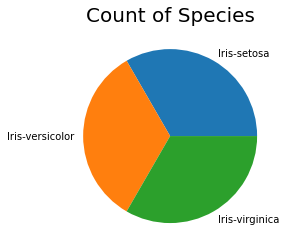

In [16]:
plt.pie(count,labels = allspecies)
plt.title('Count of Species',fontsize = 20)
plt.show()

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

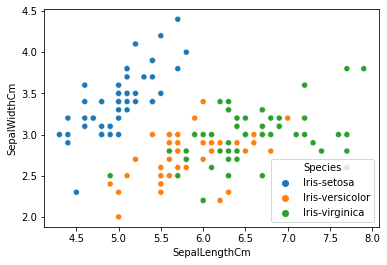

In [17]:
# plotting scatterplot to demonstrate relationship between sepal width & sepal length

sns.scatterplot(x = 'SepalLengthCm',y='SepalWidthCm' , data=iris,hue='Species')


<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

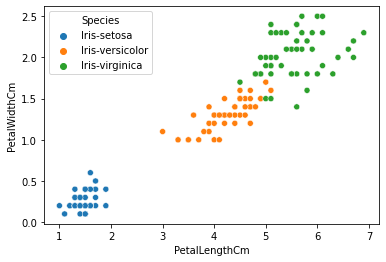

In [18]:
# plotting scatterplot to demonstrate relationship between petal width & petal length

sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species')

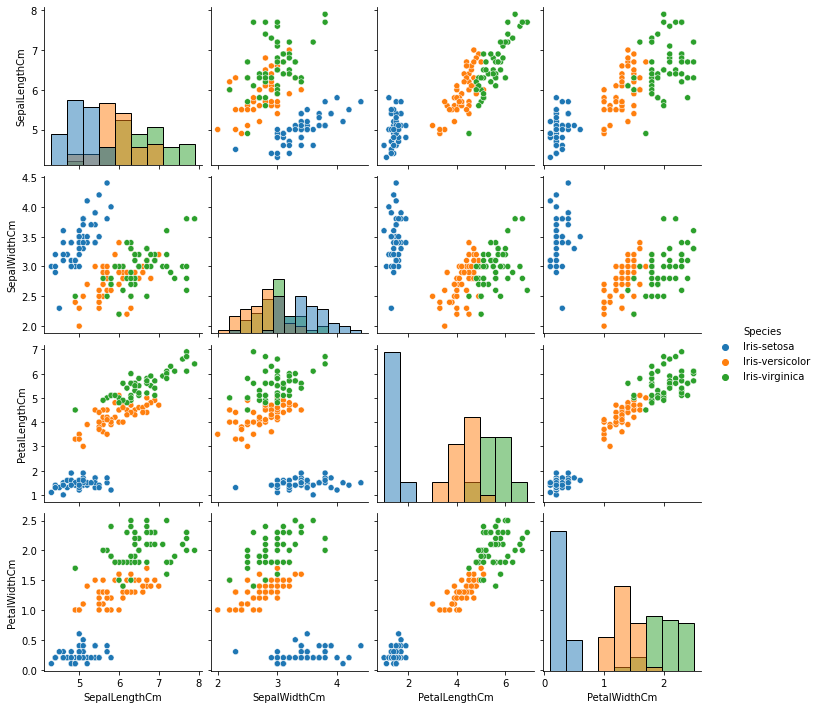

In [21]:
# relation of all features with each other

iris1 = iris.drop('Id',axis=1)
plot = sns.pairplot(iris1,hue='Species',diag_kind='hist')

In [22]:
# model building

from sklearn.model_selection import train_test_split

In [23]:
X = iris.drop(['Species','Id'],axis = 1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
Y = iris['Species']
Y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [28]:
model = LogisticRegression(max_iter=1000)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [31]:
prediction = model.predict(x_test)
print(classification_report(y_test,prediction))
print('Confusion Matrix\n',confusion_matrix(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix
 [[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [32]:
# accuracy of model

print(accuracy_score(y_test,prediction))

0.9777777777777777


In [38]:
# prediction of new data

new_iris = pd.DataFrame({
    'SepalLengthCm': [ 5.1, 6.9],
    'SepalWidthCm': [3.5, 3.1],
    'PetalLengthCm': [1.4, 3.4],
    'PetalWidthCm': [0.2, 1.5]
})

In [39]:
# scaling new data using StandardScaler

scaler = StandardScaler()
scaled_new_iris = scaler.fit_transform(new_iris)

In [40]:
# using trained Logistic regression model to predict species of new data provided

predicted_species = model.predict(scaled_new_iris)
print(predicted_species)

['Iris-setosa' 'Iris-setosa']
